In [49]:
#Before any code I'm going to import all dependancies
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

# 1 Initial exploration
### 1.1 Importing the dataset
Before I can do anything with this dataset I need to import into this python file. To do that I will need to make it a pandas dataset as I find this easiest to manipulate and it has a function for importing csv files.

In [2]:
#Import a csv file that was sourced from https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.2 Understanding the dataset
Now the dataset is in a pandas dataframe I should be able to delve deeper into the database and find what properties I am looking at and other questions I may want to find out:

* What statistics am I looking at (i.e. range of quality)
* Is there any rows with missing values and are they importent

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From looking at these statistics I can see that the quality of wine has a range of 5 (3-8) which I am a little disapointed as this limits the categories I aim for as if it was a range of 10 I could have 3 or 4 catogories but I am going to make this into a binary classification problem by saying 3-5 is bad quality wine represented by 0 and 6-8 is good quality wine represented by 1. 

In [4]:
df['quality'] = df['quality'].map({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})

Now quality is binary I can do a binary classification ploblem I can start working towards finding the missing rows.

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

I found out that the database is full so I can now do analysis without any unpredictable behavour.

# 2 Making a prototype
### 2.1 Final preperations
Now that I have decided what to do the model based on I need to make all of the features into a tensor so there are no features that dominate due to it allowing larger numbers than others:

In [6]:
target = df['quality']
df = df.drop('quality', axis=1)
mean = df.mean(axis=0)
std = df.std(axis=0)
df -= mean
df /= std
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


Now the data is ready for deep learning it is time to actually implement the deep learning. First I need to split the data up into testing and training data:

In [7]:
#The data is already split into feature and target
X = df
y = target
#Now just split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Finally I need to split the test data into test and validation
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5)

### 2.2 Running the prototype
Now that I have prepared the data for deep learning it is therefore ready to be processed. I am only going to do the initial stage as for now I just want to find out if this is going to work therefore I need it to beat the baseline: 

In [8]:
#Make the model
def basicModel():
    Model = models.Sequential()
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [9]:
# Run the model
Model = basicModel()
result = Model.fit(X_train, y_train, epochs = 1, batch_size=50)

24/24 [==============================] - 0s 876us/step - loss: 0.9680 - accuracy: 0.4829


As this beats the baseline of 0.5 this means the model is statistical powerful and I can continue with this project.

# 3 Improving a prototype
### 3.1 Scalling up
Now that the prototype shows that the model has statistical power I can work on trying to make it even better. The first step would be to improve the amount of epochs to run it through:

In [10]:
Model = basicModel()
result = Model.fit(X_train, y_train, epochs = 50, batch_size=50)

Epoch 1/50
24/24 [==============================] - 0s 724us/step - loss: 0.8472 - accuracy: 0.4554
Epoch 2/50
24/24 [==============================] - 0s 542us/step - loss: 0.8210 - accuracy: 0.4687
Epoch 3/50
24/24 [==============================] - 0s 330us/step - loss: 0.7982 - accuracy: 0.4871
Epoch 4/50
24/24 [==============================] - 0s 836us/step - loss: 0.7772 - accuracy: 0.4971
Epoch 5/50
24/24 [==============================] - 0s 431us/step - loss: 0.7583 - accuracy: 0.5129
Epoch 6/50
24/24 [==============================] - 0s 868us/step - loss: 0.7399 - accuracy: 0.5296
Epoch 7/50
24/24 [==============================] - 0s 802us/step - loss: 0.7229 - accuracy: 0.5463
Epoch 8/50
24/24 [==============================] - 0s 569us/step - loss: 0.7068 - accuracy: 0.5646
Epoch 9/50
24/24 [==============================] - 0s 501us/step - loss: 0.6920 - accuracy: 0.5838
Epoch 10/50
24/24 [==============================] - 0s 554us/step - loss: 0.6781 - accuracy: 0.6013

At 36 epochs the algorithm starts to overfit so for now I am going to run the algorithm for 36 epochs. Now I have worked out how many epochs I need to run the model on it is time to add layers to the model:

In [11]:
#Make the model
def layeredModel():
    Model = models.Sequential()
    Model.add(layers.Dense(4, activation='relu'))
    Model.add(layers.Dense(4, activation='relu'))
    Model.add(layers.Dense(4, activation='relu'))
    Model.add(layers.Dense(4, activation='relu'))
    Model.add(layers.Dense(4, activation='relu'))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [12]:
Model = layeredModel()
result = Model.fit(X_train, y_train, epochs = 36, batch_size=50)

Epoch 1/36
24/24 [==============================] - 1s 493us/step - loss: 0.6891 - accuracy: 0.5471
Epoch 2/36
24/24 [==============================] - 0s 582us/step - loss: 0.6840 - accuracy: 0.5480
Epoch 3/36
24/24 [==============================] - 0s 636us/step - loss: 0.6788 - accuracy: 0.5480
Epoch 4/36
24/24 [==============================] - 0s 678us/step - loss: 0.6726 - accuracy: 0.5480
Epoch 5/36
24/24 [==============================] - 0s 701us/step - loss: 0.6657 - accuracy: 0.5480
Epoch 6/36
24/24 [==============================] - 0s 769us/step - loss: 0.6586 - accuracy: 0.5480
Epoch 7/36
24/24 [==============================] - 0s 660us/step - loss: 0.6512 - accuracy: 0.5480
Epoch 8/36
24/24 [==============================] - 0s 566us/step - loss: 0.6433 - accuracy: 0.5480
Epoch 9/36
24/24 [==============================] - 0s 511us/step - loss: 0.6352 - accuracy: 0.5480
Epoch 10/36
24/24 [==============================] - 0s 735us/step - loss: 0.6277 - accuracy: 0.6339

| hidden_layers | accuracy |
|---------------|----------|
| 0             | 0.7248   |
| 1             | 0.7373   |
| 2             | 0.7423   |
| 3             | 0.7515   |
| 4             | 0.7415   |
| 5             | 0.7373   |

As the model starts to overfit at 4 hidden layers I am going to run the real model at 3 hidden layers. Now it is ready to work out how dense the layers of the model should be:

In [13]:
def denseModel():
    Model = models.Sequential()
    Model.add(layers.Dense(2048, activation='relu'))
    Model.add(layers.Dense(2048, activation='relu'))
    Model.add(layers.Dense(2048, activation='relu'))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [14]:
Model = denseModel()
result = Model.fit(X_train, y_train, epochs = 36, batch_size=50)

Epoch 1/36
24/24 [==============================] - 3s 93ms/step - loss: 0.8351 - accuracy: 0.6564
Epoch 2/36
24/24 [==============================] - 2s 94ms/step - loss: 0.5465 - accuracy: 0.7256
Epoch 3/36
24/24 [==============================] - 2s 95ms/step - loss: 0.5249 - accuracy: 0.7431
Epoch 4/36
24/24 [==============================] - 2s 94ms/step - loss: 0.4979 - accuracy: 0.7590
Epoch 5/36
24/24 [==============================] - 2s 95ms/step - loss: 0.5008 - accuracy: 0.7673
Epoch 6/36
24/24 [==============================] - 2s 95ms/step - loss: 0.4735 - accuracy: 0.7706
Epoch 7/36
24/24 [==============================] - 2s 95ms/step - loss: 0.4637 - accuracy: 0.7756
Epoch 8/36
24/24 [==============================] - 2s 94ms/step - loss: 0.4441 - accuracy: 0.7932
Epoch 9/36
24/24 [==============================] - 2s 95ms/step - loss: 0.4382 - accuracy: 0.7898
Epoch 10/36
24/24 [==============================] - 2s 94ms/step - loss: 0.4062 - accuracy: 0.8140
Epoch 11/

| Density  | accuracy |
|----------|----------|
| 4        | 0.7581   |
| 8        | 0.7656   |
| 16       | 0.7665   |
| 32       | 0.8190   |
| 64       | 0.8791   |
| 128      | 0.9099   |
| 256      | 0.9358   |
| 512      | 0.9700   |
| 1024     | 0.9658   |
| 2048     | 0.9500   |

As the model starts to overfit the training data when the density is 1024 I am going to make a model that has layers with density of 512. Now I have scaled up the model I am going to regulize to get the perfect model.
### 3.2 Regularizing and tuning hyperparameters
Now we have scaled the model up we need to refine the model. This will require using the validation data as this isn't about trying to overfit the training data anymore I will need to assess the model on unseen data to get a better idea of how as accurate the model is. The first step to do this is changing the architecture of the model:

In [15]:
def archModel():
    Model = models.Sequential()
    Model.add(layers.Dense(512, activation='relu'))
    Model.add(layers.Dense(512, activation='relu'))
    Model.add(layers.Dense(1024, activation='relu'))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [16]:
Model = archModel()
result = Model.fit(X_train, y_train, epochs = 36, batch_size=50, validation_data=(X_validation, y_validation))

Epoch 1/36
24/24 [==============================] - 1s 14ms/step - loss: 0.5941 - accuracy: 0.6922 - val_loss: 0.5234 - val_accuracy: 0.7600
Epoch 2/36
24/24 [==============================] - 0s 9ms/step - loss: 0.5176 - accuracy: 0.7456 - val_loss: 0.4997 - val_accuracy: 0.7500
Epoch 3/36
24/24 [==============================] - 0s 9ms/step - loss: 0.5092 - accuracy: 0.7648 - val_loss: 0.4919 - val_accuracy: 0.7600
Epoch 4/36
24/24 [==============================] - 0s 9ms/step - loss: 0.4877 - accuracy: 0.7715 - val_loss: 0.5233 - val_accuracy: 0.7450
Epoch 5/36
24/24 [==============================] - 0s 9ms/step - loss: 0.4609 - accuracy: 0.7790 - val_loss: 0.5130 - val_accuracy: 0.7550
Epoch 6/36
24/24 [==============================] - 0s 9ms/step - loss: 0.4526 - accuracy: 0.7848 - val_loss: 0.4789 - val_accuracy: 0.7700
Epoch 7/36
24/24 [==============================] - 0s 9ms/step - loss: 0.4379 - accuracy: 0.7940 - val_loss: 0.5018 - val_accuracy: 0.7800
Epoch 8/36
24/24 [=

| architecture | accuracy | val_accuracy |
|--------------|----------|--------------|
| 512,256,256  | 0.9483   | 0.7500       |
| 256,512,256  | 0.9633   | 0.7600       |
| 256,256,512  | 0.9508   | 0.7700       |
| 512,512,256  | 0.9633   | 0.7500       |
| 512,256,512  | 0.9641   | 0.7600       |
| 256,512,512  | 0.9650   | 0.7200       |
| 512,512,512  | 0.9650   | 0.7700       |
| 1024,512,512 | 0.9700   | 0.7600       |
| 512,1024,512 | 0.9683   | 0.7500       |
| 512,512,1024 | 0.9691   | 0.7400       |

All of these architectures have similar validation accuracy but it looks like the architecture that does the best is the one that has all three layers having the density of 512. Now we have worked out what the architecture of our model we can start adding dropout to the model:

In [17]:
def dropoutModel():
    Model = models.Sequential()
    Model.add(layers.Dense(512, activation='relu'))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu'))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu'))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [18]:
Model = dropoutModel()
result = Model.fit(X_train, y_train, epochs = 36, batch_size=50, validation_data=(X_validation, y_validation))

Epoch 1/36
24/24 [==============================] - 1s 10ms/step - loss: 0.5743 - accuracy: 0.7023 - val_loss: 0.5035 - val_accuracy: 0.7550
Epoch 2/36
24/24 [==============================] - 0s 7ms/step - loss: 0.5322 - accuracy: 0.7440 - val_loss: 0.4937 - val_accuracy: 0.7500
Epoch 3/36
24/24 [==============================] - 0s 7ms/step - loss: 0.5074 - accuracy: 0.7556 - val_loss: 0.5028 - val_accuracy: 0.7400
Epoch 4/36
24/24 [==============================] - 0s 7ms/step - loss: 0.5044 - accuracy: 0.7490 - val_loss: 0.4974 - val_accuracy: 0.7300
Epoch 5/36
24/24 [==============================] - 0s 7ms/step - loss: 0.5004 - accuracy: 0.7506 - val_loss: 0.4950 - val_accuracy: 0.7650
Epoch 6/36
24/24 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.7648 - val_loss: 0.5042 - val_accuracy: 0.7500
Epoch 7/36
24/24 [==============================] - 0s 7ms/step - loss: 0.4704 - accuracy: 0.7748 - val_loss: 0.5113 - val_accuracy: 0.7500
Epoch 8/36
24/24 [=

| dropout | accuracy | val_accuracy |
|---------|----------|--------------|
| 0       | 0.9591   | 0.7550       |
| 0.2     | 0.8941   | 0.7700       |
| 0.3     | 0.8532   | 0.7250       |
| 0.5     | 0.7915   | 0.7650       |
| 0.25    | 0.8649   | 0.7500       |
| 0.15    | 0.9141   | 0.7300       |

From this table we can see the dropout that gives us the highest validation accuracy is 0.2. Therefore I am going to use this to make my real model. The last thing I need to do in order to have a fully optimized model is to add regularizations to my model:

In [25]:
def lossModel():
    Model = models.Sequential()
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [26]:
Model = lossModel()
result = Model.fit(X_train, y_train, epochs = 36, batch_size=50, validation_data=(X_validation, y_validation))

Epoch 1/36
24/24 [==============================] - 1s 13ms/step - loss: 1.3898 - accuracy: 0.7081 - val_loss: 1.1781 - val_accuracy: 0.7600
Epoch 2/36
24/24 [==============================] - 0s 9ms/step - loss: 1.0934 - accuracy: 0.7373 - val_loss: 0.9952 - val_accuracy: 0.7400
Epoch 3/36
24/24 [==============================] - 0s 9ms/step - loss: 0.9104 - accuracy: 0.7565 - val_loss: 0.8361 - val_accuracy: 0.7350
Epoch 4/36
24/24 [==============================] - 0s 9ms/step - loss: 0.7943 - accuracy: 0.7565 - val_loss: 0.7497 - val_accuracy: 0.7650
Epoch 5/36
24/24 [==============================] - 0s 8ms/step - loss: 0.7148 - accuracy: 0.7573 - val_loss: 0.7057 - val_accuracy: 0.7350
Epoch 6/36
24/24 [==============================] - 0s 9ms/step - loss: 0.6652 - accuracy: 0.7665 - val_loss: 0.6758 - val_accuracy: 0.7350
Epoch 7/36
24/24 [==============================] - 0s 9ms/step - loss: 0.6317 - accuracy: 0.7540 - val_loss: 0.6341 - val_accuracy: 0.7500
Epoch 8/36
24/24 [=

| Regulation | amount | accuracy | val_accuracy |
|------------|--------|----------|--------------|
| None       | 0      | 0.9241   | 0.7300       |
| L1         | 0.001  | 0.7573   | 0.7500       |
| L2         | 0.001  | 0.8390   | 0.7850       |
| L1, L2     | 0.001  | 0.7389   | 0.7350       |
| L2         | 0.002  | 0.8440   | 0.7650       |

This table shows that the best regularizers is L2 with the weight being 0.001 as this produces the highest val_accuracy at 0.7850.

### 3.3 Running the final network
Now I have scaled my model up and regularized it I need to run my final network.

In [27]:
def finalModel():
    Model = models.Sequential()
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [29]:
Model = finalModel()
result = Model.fit(X_train, y_train, epochs = 36, batch_size=50, validation_data=(X_validation, y_validation))

Epoch 1/36
24/24 [==============================] - 1s 13ms/step - loss: 1.3887 - accuracy: 0.7014 - val_loss: 1.1688 - val_accuracy: 0.7400
Epoch 2/36
24/24 [==============================] - 0s 9ms/step - loss: 1.0812 - accuracy: 0.7406 - val_loss: 0.9612 - val_accuracy: 0.7550
Epoch 3/36
24/24 [==============================] - 0s 8ms/step - loss: 0.9003 - accuracy: 0.7556 - val_loss: 0.8474 - val_accuracy: 0.7600
Epoch 4/36
24/24 [==============================] - 0s 8ms/step - loss: 0.7919 - accuracy: 0.7440 - val_loss: 0.7420 - val_accuracy: 0.7600
Epoch 5/36
24/24 [==============================] - 0s 9ms/step - loss: 0.7172 - accuracy: 0.7581 - val_loss: 0.6773 - val_accuracy: 0.7650
Epoch 6/36
24/24 [==============================] - 0s 9ms/step - loss: 0.6748 - accuracy: 0.7598 - val_loss: 0.6382 - val_accuracy: 0.7550
Epoch 7/36
24/24 [==============================] - 0s 9ms/step - loss: 0.6348 - accuracy: 0.7590 - val_loss: 0.6215 - val_accuracy: 0.7550
Epoch 8/36
24/24 [=

# 4 Results
### 4.1 My basic model vs. my optimised model
Now we have run the final model it is time to compare how a prototype model compares with my optimised model to do this I am going to run both models for 36 epochs on the previously unseen test data to see if and how much better my optimised model does against and a basic model:

In [30]:
def basicModel():
    Model = models.Sequential()
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [36]:
Model = basicModel()
basicResult = Model.fit(X_train, y_train, epochs = 36, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/36
24/24 [==============================] - 0s 4ms/step - loss: 0.8259 - accuracy: 0.5113 - val_loss: 0.8503 - val_accuracy: 0.5100
Epoch 2/36
24/24 [==============================] - 0s 614us/step - loss: 0.7941 - accuracy: 0.5288 - val_loss: 0.8215 - val_accuracy: 0.5200
Epoch 3/36
24/24 [==============================] - 0s 821us/step - loss: 0.7675 - accuracy: 0.5396 - val_loss: 0.7950 - val_accuracy: 0.5300
Epoch 4/36
24/24 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.5588 - val_loss: 0.7685 - val_accuracy: 0.5350
Epoch 5/36
24/24 [==============================] - 0s 1ms/step - loss: 0.7181 - accuracy: 0.5721 - val_loss: 0.7435 - val_accuracy: 0.5450
Epoch 6/36
24/24 [==============================] - 0s 672us/step - loss: 0.6967 - accuracy: 0.5880 - val_loss: 0.7210 - val_accuracy: 0.5700
Epoch 7/36
24/24 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.6072 - val_loss: 0.6990 - val_accuracy: 0.5950
Epoch 8/36
24/

In [33]:
def finalModel():
    Model = models.Sequential()
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    Model.add(layers.Dropout(0.15))
    Model.add(layers.Dense(1, activation='sigmoid'))
    Model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return Model

In [44]:
Model = finalModel()
finalResult = Model.fit(X_train, y_train, epochs = 36, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/36
24/24 [==============================] - 1s 13ms/step - loss: 1.4034 - accuracy: 0.7073 - val_loss: 1.1455 - val_accuracy: 0.7850
Epoch 2/36
24/24 [==============================] - 0s 9ms/step - loss: 1.0842 - accuracy: 0.7423 - val_loss: 0.9617 - val_accuracy: 0.7850
Epoch 3/36
24/24 [==============================] - 0s 9ms/step - loss: 0.9105 - accuracy: 0.7423 - val_loss: 0.8275 - val_accuracy: 0.7850
Epoch 4/36
24/24 [==============================] - 0s 9ms/step - loss: 0.7846 - accuracy: 0.7565 - val_loss: 0.7160 - val_accuracy: 0.7900
Epoch 5/36
24/24 [==============================] - 0s 9ms/step - loss: 0.7210 - accuracy: 0.7565 - val_loss: 0.6610 - val_accuracy: 0.7900
Epoch 6/36
24/24 [==============================] - 0s 9ms/step - loss: 0.6729 - accuracy: 0.7573 - val_loss: 0.6357 - val_accuracy: 0.7650
Epoch 7/36
24/24 [==============================] - 0s 9ms/step - loss: 0.6310 - accuracy: 0.7631 - val_loss: 0.6275 - val_accuracy: 0.7750
Epoch 8/36
24/24 [=

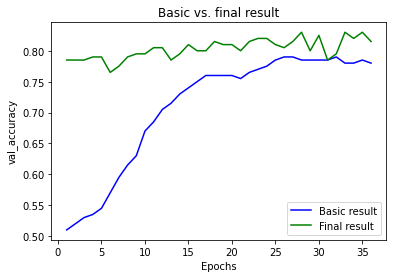

In [53]:
#Compare results using a graph
basicValAcc = basicResult.history['val_accuracy']
finalValAcc = finalResult.history['val_accuracy']
epochs = range(1, len(finalValAcc) + 1)
plt.plot(epochs, basicValAcc, 'b', label = 'Basic result')
plt.plot(epochs, finalValAcc, 'g', label = 'Final result')
plt.title('Basic vs. final result')
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

Finally as you could see from the results and the graph the final model does better than the basic model when testing on new data. The basic model ends up at 0.78 while the final model ends up at 0.815 the final model ends up being 0.035 better which is quite small but this model does give an exceptible rate of accuracy for someone to be sure if their wine is good or bad.